<a href="https://colab.research.google.com/github/VaishaliDhote/ParkEase/blob/master/CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_test.shape
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

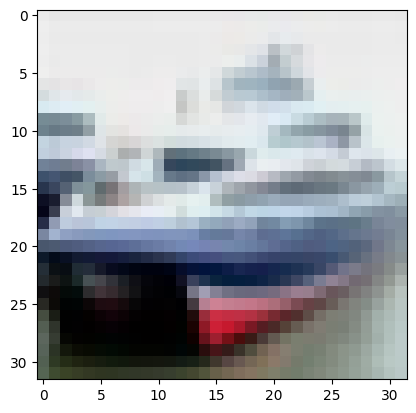

In [ ]:
plt.imshow(X_test[1])

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

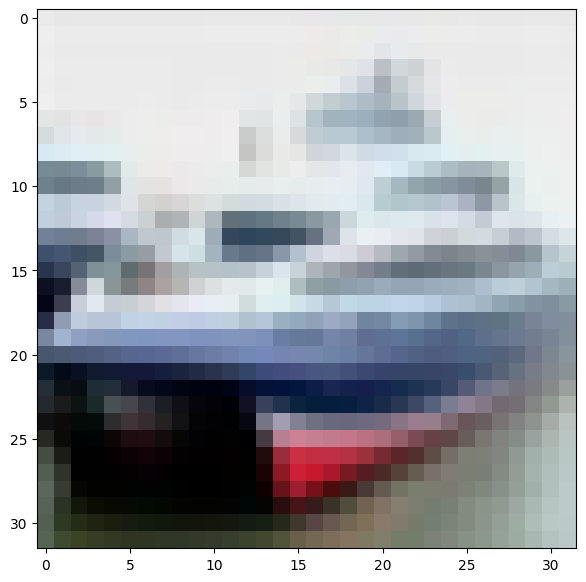

In [ ]:
from operator import index
plt.figure(figsize=[10,7])
plt.imshow(X_test[1])
#plt.xlabel(classes[y_test])

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,5))
  plt.imshow(X[index])
  plt.xlabel(classes[int(y_test[index])])

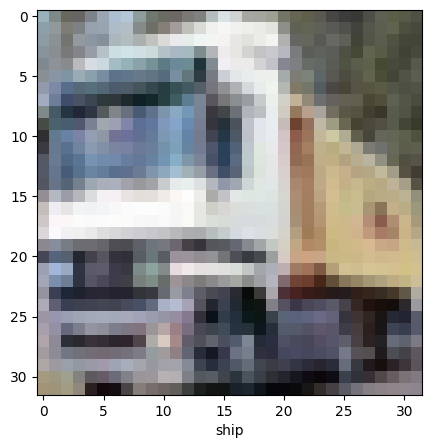

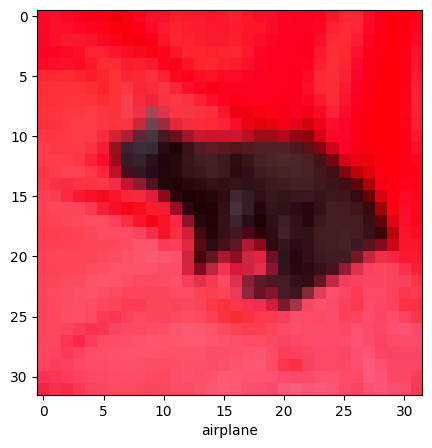

In [ ]:
plot_sample(X_train,y_train,1)
plot_sample(X_train,y_train,21)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
#X_train

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

In [ ]:
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 194s 124ms/step - loss: 2.3011 - accuracy: 0.1201
Epoch 2/5
1563/1563 [==============================] - 166s 106ms/step - loss: 2.3000 - accuracy: 0.1286
Epoch 3/5
1563/1563 [==============================] - 165s 106ms/step - loss: 2.2994 - accuracy: 0.1256
Epoch 4/5
1563/1563 [==============================] - 169s 108ms/step - loss: 2.2985 - accuracy: 0.1459
Epoch 5/5
1563/1563 [==============================] - 163s 104ms/step - loss: 2.2976 - accuracy: 0.1492


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 31ms/step - loss: 2.2968 - accuracy: 0.1317


[2.2968223094940186, 0.13169999420642853]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_predict=ann.predict(X_test)
y_predict_classes=[np.argmax(element) for element in y_predict]
print(classification_report(y_test,y_predict_classes))

313/313 [==============================] - 10s 31ms/step
              precision    recall  f1-score   support

           0       0.61      0.01      0.02      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.22      0.01      0.02      1000
           5       0.42      0.04      0.08      1000
           6       0.00      0.00      0.00      1000
           7       0.11      0.33      0.17      1000
           8       0.00      0.00      0.00      1000
           9       0.13      0.92      0.23      1000

    accuracy                           0.13     10000
   macro avg       0.15      0.13      0.05     10000
weighted avg       0.15      0.13      0.05     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_predict=ann.predict(X_test)
#y_predict[:5]

313/313 [==============================] - 11s 35ms/step


In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,5))
  plt.imshow(X[index])
  plt.xlabel(classes[int(y_test[index])])

In [ ]:
classes[y_classes[1822]]

'dog'

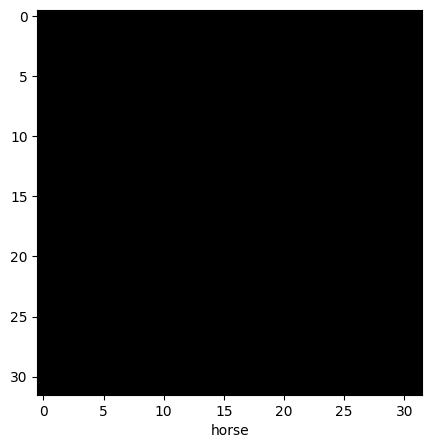

In [ ]:
plot_sample(X_test,y_test,1822)

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    #DENSE
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4651 - accuracy: 0.4750
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1225 - accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9962 - accuracy: 0.6539
Epoch 4/10
1563/1563 [==============================] - 99s 64ms/step - loss: 0.9100 - accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8423 - accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7870 - accuracy: 0.7274
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7426 - accuracy: 0.7425
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7008 - accuracy: 0.7549
Epoch 9/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.6642 - accuracy: 0.7675
Epoch 10/10
1563/1563 [==============================] - 59s 38

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9790 - accuracy: 0.6812


[0.9789711833000183, 0.6812000274658203]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_predict=cnn.predict(X_test)
y_predict_classes=[np.argmax(element) for element in y_predict]
print(classification_report(y_test,y_predict_classes))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.82      0.62      0.70      1000
           1       0.84      0.76      0.80      1000
           2       0.63      0.54      0.58      1000
           3       0.54      0.39      0.45      1000
           4       0.66      0.61      0.63      1000
           5       0.48      0.77      0.59      1000
           6       0.72      0.79      0.76      1000
           7       0.83      0.67      0.74      1000
           8       0.72      0.84      0.78      1000
           9       0.71      0.83      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [ ]:
y_predict=cnn.predict(X_test)
y_predict[:5]

313/313 [==============================] - 4s 14ms/step


array([[2.9203820e-04, 5.1324436e-04, 2.9184652e-04, 8.0662680e-01,
        1.2867757e-03, 1.7802982e-01, 5.5803964e-03, 1.9372866e-04,
        4.4699125e-03, 2.7154642e-03],
       [4.4858811e-05, 4.7551552e-03, 1.4864507e-07, 7.3521753e-09,
        1.5005556e-07, 1.0361774e-10, 1.4981790e-09, 6.1066269e-10,
        9.9375015e-01, 1.4495663e-03],
       [2.1475703e-02, 1.5555464e-01, 8.4242056e-04, 3.0390548e-03,
        6.8476849e-04, 8.4930311e-05, 1.5437053e-04, 3.5971618e-04,
        7.5852466e-01, 5.9279706e-02],
       [7.4820447e-01, 2.7069642e-04, 3.9744075e-02, 4.6801279e-04,
        2.2327609e-02, 8.1223479e-05, 1.2611665e-03, 3.6163258e-06,
        1.8753316e-01, 1.0609129e-04],
       [3.1521884e-06, 2.4291217e-05, 1.0044937e-02, 6.6473007e-02,
        3.7098497e-01, 4.2243181e-03, 5.4822296e-01, 8.0701369e-07,
        2.1495536e-05, 1.0718302e-07]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_predict]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
classes[y_classes[12]]

'dog'

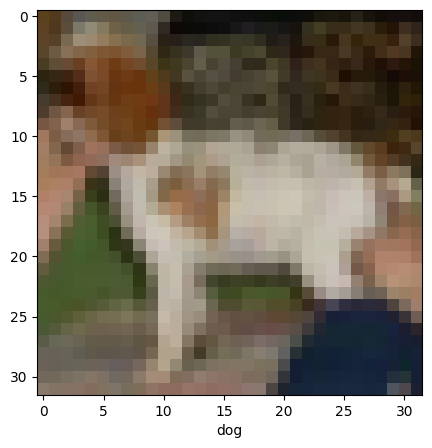

In [ ]:
plot_sample(X_test,y_test,12)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])


In [ ]:
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 219s 139ms/step - loss: 2.2997 - accuracy: 0.1278
Epoch 2/5
1563/1563 [==============================] - 163s 105ms/step - loss: 2.2990 - accuracy: 0.1466
Epoch 3/5
1563/1563 [==============================] - 160s 102ms/step - loss: 2.2980 - accuracy: 0.1455
Epoch 4/5
1563/1563 [==============================] - 158s 101ms/step - loss: 2.2970 - accuracy: 0.1529
Epoch 5/5
1563/1563 [==============================] - 173s 111ms/step - loss: 2.2956 - accuracy: 0.1673


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 15s 46ms/step - loss: 2.2946 - accuracy: 0.2269


[2.2946040630340576, 0.22689999639987946]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_predict=ann.predict(X_test)
y_predict_classes=[np.argmax(element) for element in y_predict]
print(classification_report(y_test,y_predict_classes))

313/313 [==============================] - 10s 31ms/step
              precision    recall  f1-score   support

           0       0.25      0.52      0.34      1000
           1       0.24      0.31      0.27      1000
           2       0.14      0.38      0.20      1000
           3       0.00      0.00      0.00      1000
           4       0.08      0.00      0.00      1000
           5       0.54      0.08      0.13      1000
           6       0.22      0.45      0.30      1000
           7       0.00      0.00      0.00      1000
           8       0.31      0.53      0.39      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.23     10000
   macro avg       0.18      0.23      0.16     10000
weighted avg       0.18      0.23      0.16     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_predict=ann.predict(X_test)
#y_predict[:5]

313/313 [==============================] - 10s 31ms/step


In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
classes[y_classes[1822]]

'dog'

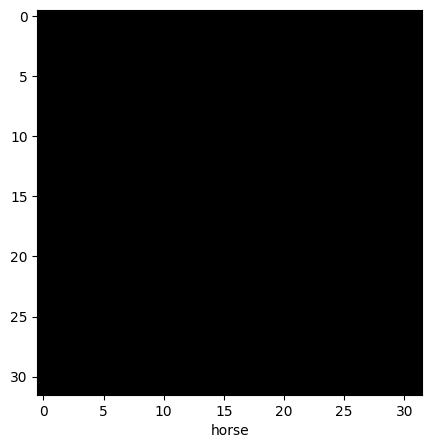

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,5))
  plt.imshow(X[index])
  plt.xlabel(classes[int(y_test[index])])
plot_sample(X_test,y_test,1822)